In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import plotly.graph_objects as go
%matplotlib inline 

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.shape

(8807, 12)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

show_id :
 ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

 **************************************** 

type :
 ['Movie' 'TV Show']
Movie      6131
TV Show    2676
Name: type, dtype: int64

 **************************************** 

title :
 ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

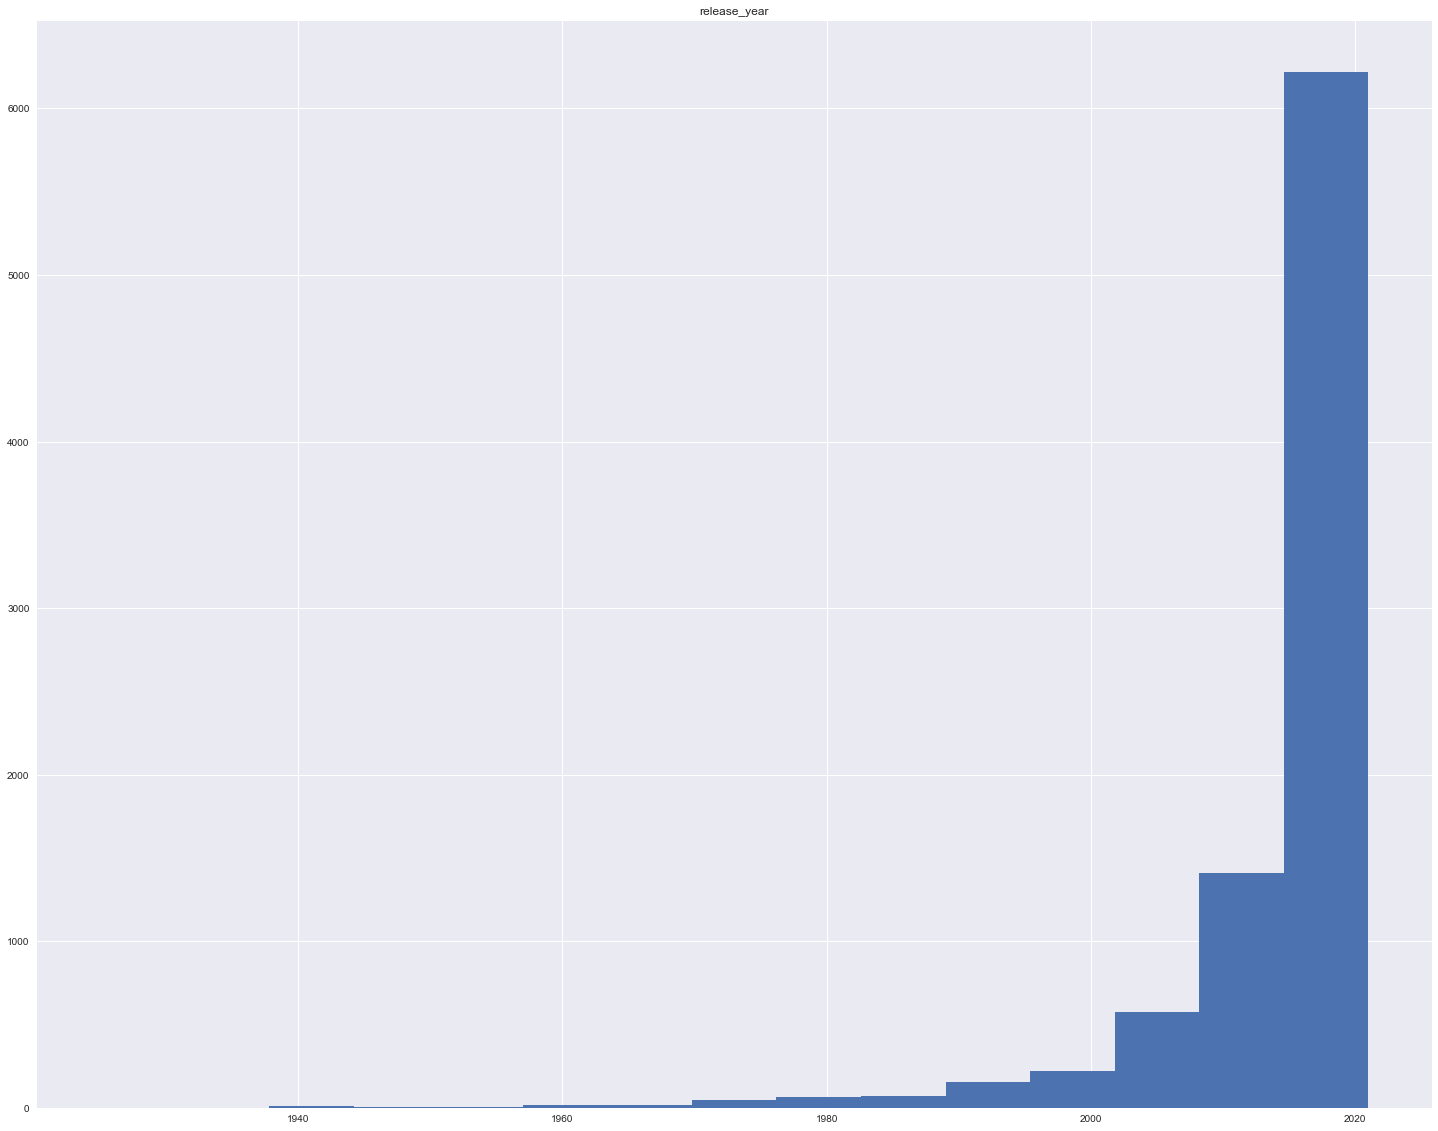

In [8]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
#Filling missing data
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

In [6]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [39]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [40]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [42]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

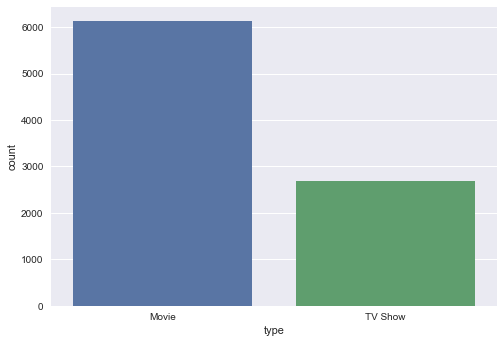

In [43]:
sns.countplot(x="type", data=df)

<AxesSubplot:ylabel='type'>

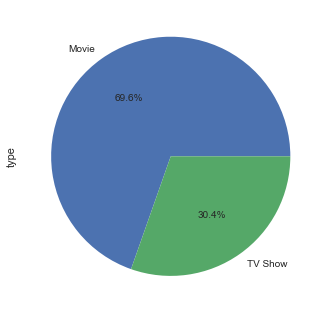

In [44]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [48]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [49]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

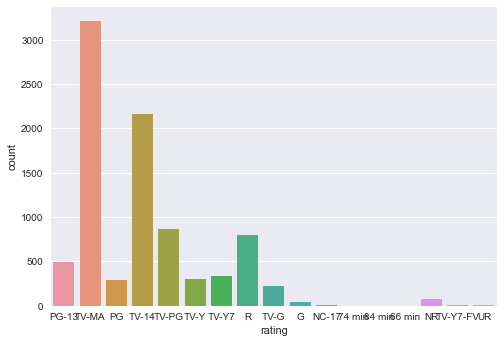

In [50]:
sns.countplot(x="rating", data=df)

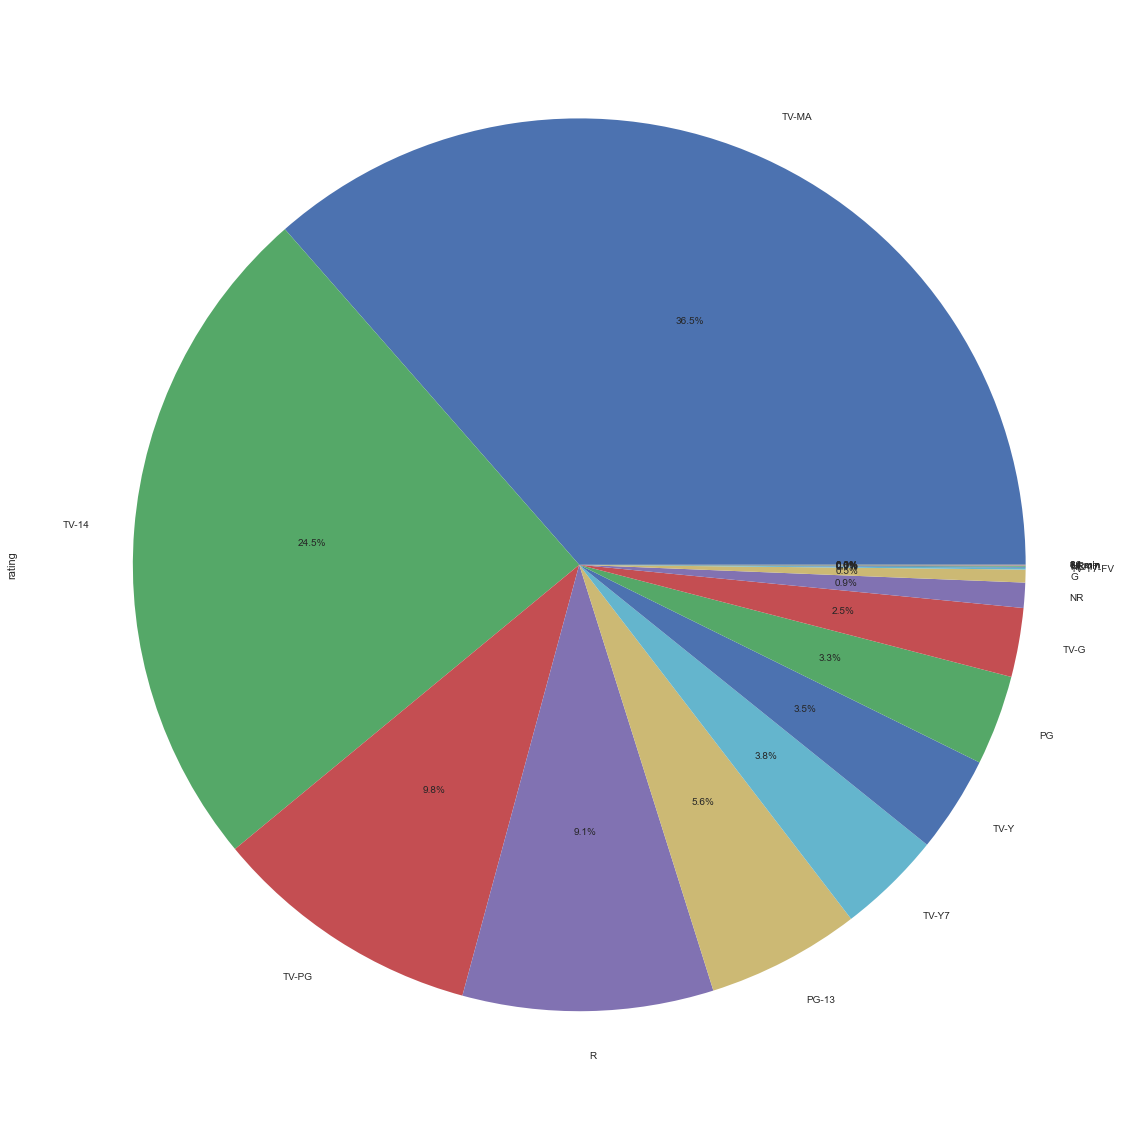

In [60]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35))
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

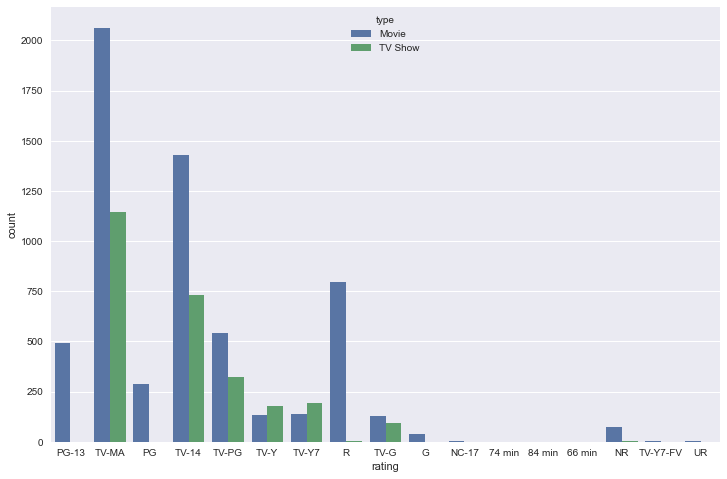

In [52]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

### In Which year and month  was content added most 

In [54]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [55]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='count'>

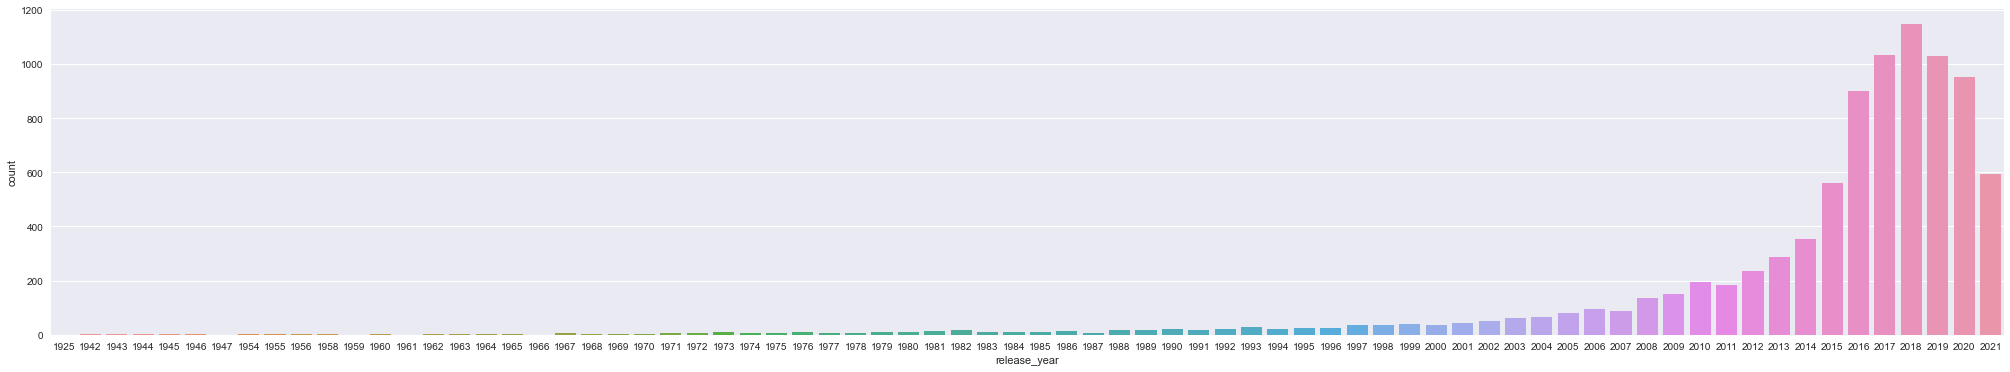

In [59]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

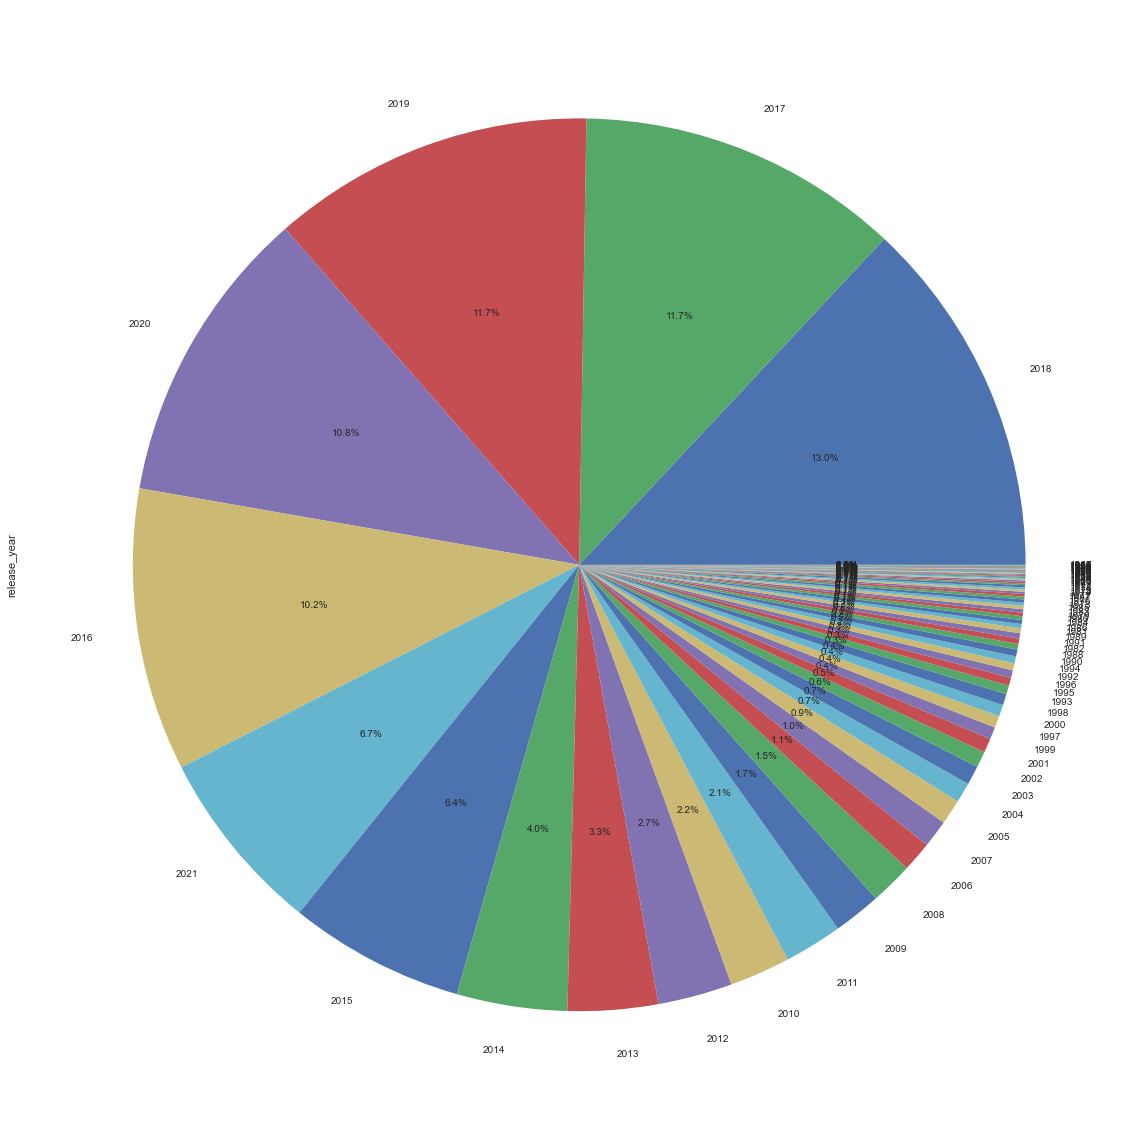

In [61]:
df['release_year'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35))
plt.show()

In [95]:
df['month_name_added'].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October'],
      dtype=object)

In [96]:
df['month_name_added'].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
January      748
March        742
June         728
November     705
May          632
February     563
Name: month_name_added, dtype: int64

<AxesSubplot:xlabel='month_name_added', ylabel='count'>

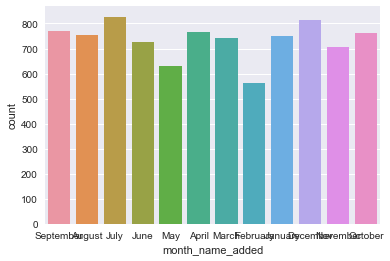

In [97]:
sns.countplot(x="month_name_added", data=df)

<AxesSubplot:ylabel='month_name_added'>

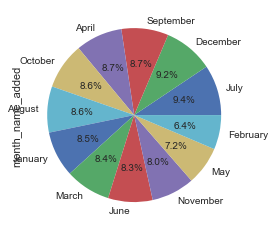

In [98]:
df['month_name_added'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

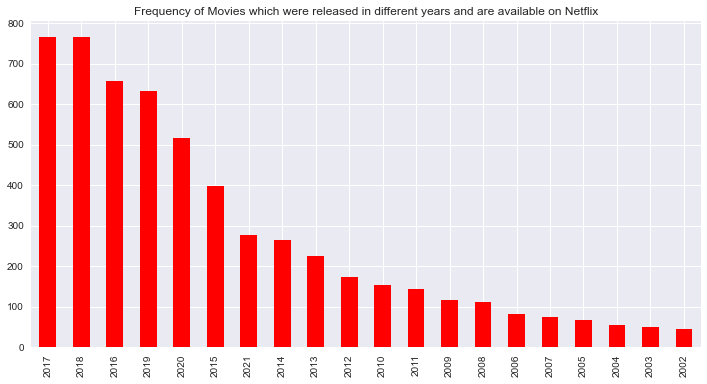

In [66]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

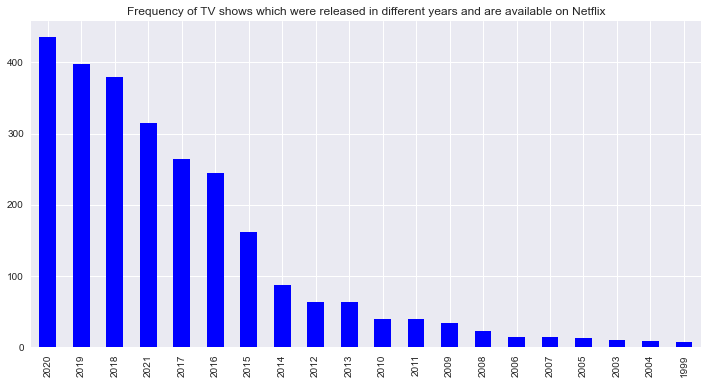

In [67]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

In [62]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of Movies')

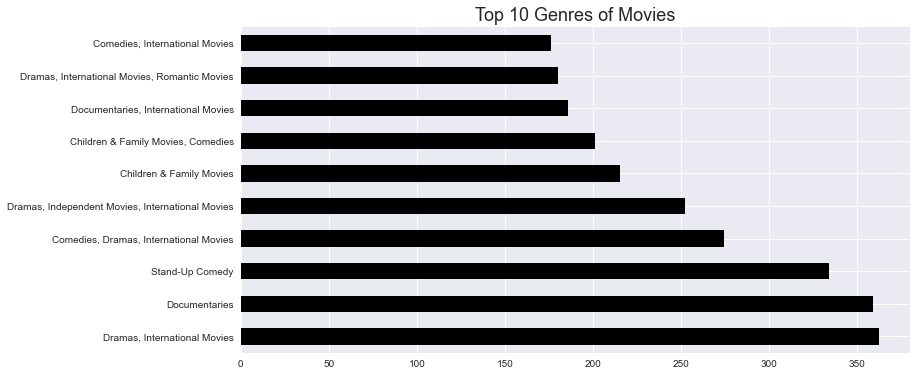

In [64]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

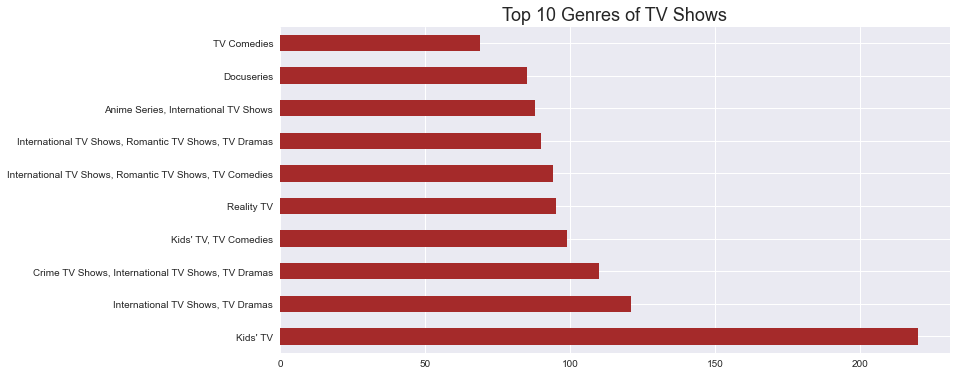

In [77]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

In [99]:
df.corr()

,release_year,month_added,year_added,from_us
release_year,1.000000,-0.038500,0.111206,-0.006094
month_added,-0.038500,1.000000,-0.161465,0.008627
year_added,0.111206,-0.161465,1.000000,0.006703
from_us,-0.006094,0.008627,0.006703,1.000000


(4.5, -0.5)

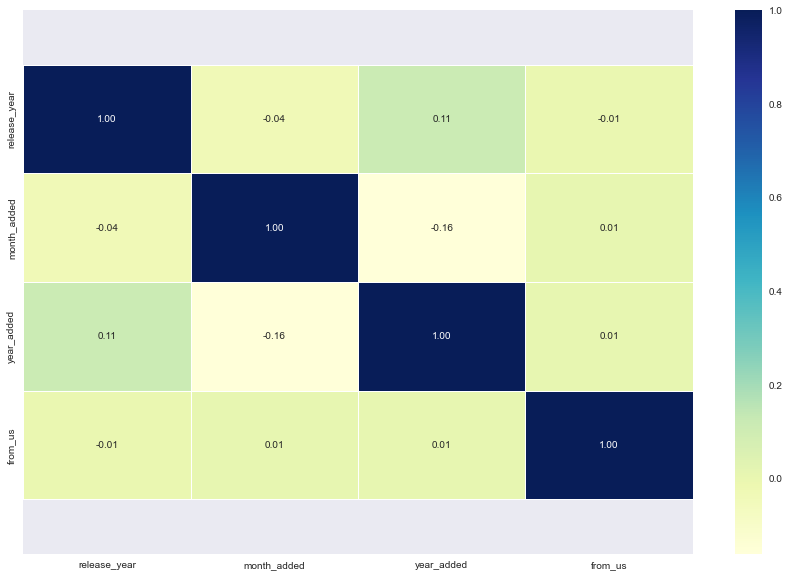

In [101]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Recommendation System

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [11]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [13]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [16]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [17]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [21]:
get_recommendations('PK')

3714                                        Unbroken
4221                           Merku Thodarchi Malai
7129                                  Jhansi Ki Rani
906     Have You Ever Seen Fireflies? - Theatre Play
4306                                            ROMA
6031                              A Clockwork Orange
4569                        Harishchandrachi Factory
4565                              Ek Main Aur Ekk Tu
4700                         Bhavesh Joshi Superhero
2148                                    The Governor
Name: title, dtype: object

In [25]:
get_recommendations('Happy New Year')

4422                      ABCD 2
2178               The Next Step
2434                 Let's Dance
787           Cradle 2 the Grave
2031                      Cuties
4423    ABCD: Any Body Can Dance
263            Mother Goose Club
6991    Honey: Rise Up and Dance
2808              We Speak Dance
7243                   Kuppivala
Name: title, dtype: object

In [27]:
get_recommendations('Up North')

5121           Christmas Inheritance
8258                      The Croods
2056                  Hotel for Dogs
649                           Broken
4411                     Bucket List
6072              Aajcha Divas Majha
829                 Dog Gone Trouble
2630                     Bittersweet
7603    NOVA: Day the Dinosaurs Died
1567               The Panti Sisters
Name: title, dtype: object

In [29]:
get_recommendations('Lionheart')

2278                              Mary Kom
6300                                Bhouri
1474                         Tarung Sarung
1924    We Have Always Lived in the Castle
4800                     Tum Milo Toh Sahi
3886                          Señora Acero
2871                               Toy Boy
148                             HQ Barbers
7925                            Samantaral
5401                              Spice Up
Name: title, dtype: object

### Content based filtering on multiple Features

In [30]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [32]:
features=['title','director','cast','listed_in','description']
df = df[features]

In [35]:
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [36]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [38]:
df['soup'] = df.apply(create_soup, axis=1)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [40]:
df = df.reset_index()
indices = pd.Series(df.index, index = df['title'])

In [43]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [44]:
get_recommendations_new('Lionheart', cosine_sim2)

3788              chopsticks
694                    aziza
4596              peacehaven
4086               paddleton
6876              goodkisser
7875         roadtoyesterday
8443             theoneilove
1219    you'reeverythingtome
1230                   aelay
1295            eeballayooo!
Name: title, dtype: object